## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

print(images.shape)
print(targets.shape)

(10000, 28, 28)
(10000,)


## Plot one of the data

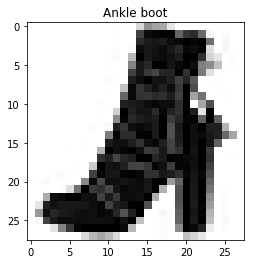

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(images[11], cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

## Flatten the image

In [5]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

print("Shape of the image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape of the image after the Flatten", model_output.shape)

Shape of the image (1, 28, 28)
Shape of the image after the Flatten (1, 784)


# Add the layers

In [6]:
# Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 9.025748e-14
  1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]] [9]


## Model Summary

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [8]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [9]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000==============================] - 1s 81us/sample - loss: 9.5145 - acc: 0.5826 - val_loss: 1.5279 - val_acc: 0.5940
Epoch 2/10
8000/8000==============================] - 0s 59us/sample - loss: 1.1117 - acc: 0.6646 - val_loss: 1.2267 - val_acc: 0.6530
Epoch 3/10
8000/8000==============================] - 0s 58us/sample - loss: 0.8864 - acc: 0.6948 - val_loss: 1.0561 - val_acc: 0.6710
Epoch 4/10
8000/8000==============================] - 0s 57us/sample - loss: 0.7499 - acc: 0.7283 - val_loss: 1.0141 - val_acc: 0.6940
Epoch 5/10
8000/8000==============================] - 1s 68us/sample - loss: 0.6543 - acc: 0.7610 - val_loss: 1.0042 - val_acc: 0.6930
Epoch 6/10
8000/8000==============================] - 0s 61us/sample - loss: 0.6079 - acc: 0.7721 - val_loss: 0.9255 - val_acc: 0.7250
Epoch 7/10
8000/8000==============================] - 1s 66us/sample - loss: 0.5708 - acc: 0.7822 - val_loss: 0.8969 - val_acc: 0.7265
Epoch 8

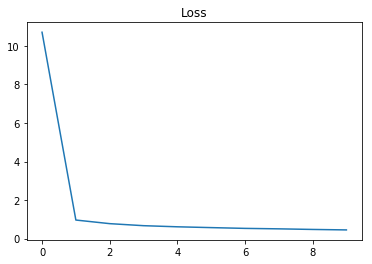

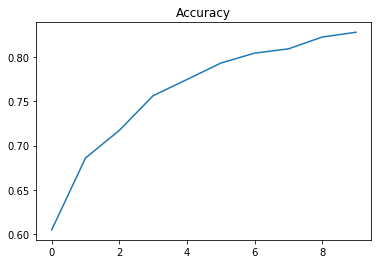

In [33]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()